In [2]:
#Visualising the pollynomial regression model results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline
#Lectura de Datos
df =pd.read_csv("WHO-COVID-19-global-data.csv",sep=",")
df.info

<bound method DataFrame.info of        Date_reported Country_code      Country WHO_region  New_cases  \
0         2020-01-03           AF  Afghanistan       EMRO          0   
1         2020-01-04           AF  Afghanistan       EMRO          0   
2         2020-01-05           AF  Afghanistan       EMRO          0   
3         2020-01-06           AF  Afghanistan       EMRO          0   
4         2020-01-07           AF  Afghanistan       EMRO          0   
...              ...          ...          ...        ...        ...   
170872    2021-12-19           ZW     Zimbabwe       AFRO       2106   
170873    2021-12-20           ZW     Zimbabwe       AFRO       1123   
170874    2021-12-21           ZW     Zimbabwe       AFRO       2283   
170875    2021-12-22           ZW     Zimbabwe       AFRO       2689   
170876    2021-12-23           ZW     Zimbabwe       AFRO       1636   

        Cumulative_cases  New_deaths  Cumulative_deaths  
0                      0           0         

In [3]:
datita = df.loc[df['Country'] == 'Afghanistan']
datita['Date_reported'] = datita['Date_reported'].astype('category').cat.codes
posx = datita.columns.get_loc('Date_reported')
posy= datita.columns.get_loc('New_cases')
x = datita.iloc[:,posx].values.reshape(-1,1)
y = datita.iloc[:,posy].values
print(y)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    5    0    0    0
    0    0    0    0    0    0    0    0    3    0    0    0    3    0
    0    3    6    5   -1    0    0    0    0   10    6    2   32    6
   11   15    8    0   52   26   43   34    1   29   38   30   56   21
   77    0   34   52   58  105   24   51   63   25   63   30   66   84
   50  104  133   68  172  124    0  344  298    0    0    0  755  168
  171    0  839  262  303    0  372  714  349  233  437  583  490  531
  540  736  716  512  737  548  637  643  784  651  656  742  775  624
 1078  582  791  575  305  920  748  656  556  664  761  106 1241  463
  541  419  536  310  338  159  535   85  356  351  271  121  403  260
  302  348  279  113  320  210   59  541  157  100    4  285  200  130
  159 

C:\Users\HEIDYC~1\AppData\Local\Temp/ipykernel_12500/1997480831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datita['Date_reported'] = datita['Date_reported'].astype('category').cat.codes


In [6]:
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(x)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

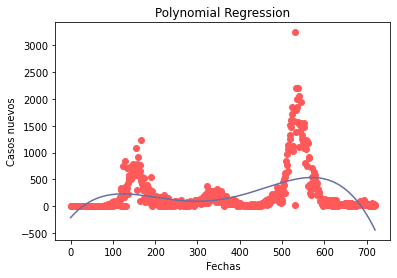

In [7]:
#Visualising the pollynomial regression model results
plt.scatter(x,y,color='#FF5959')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color='#676FA3')
plt.title('Polynomial Regression')
plt.xlabel('Fechas')
plt.ylabel('Casos nuevos')
plt.show()

ValueError: Unable to parse string "AF" at position 0

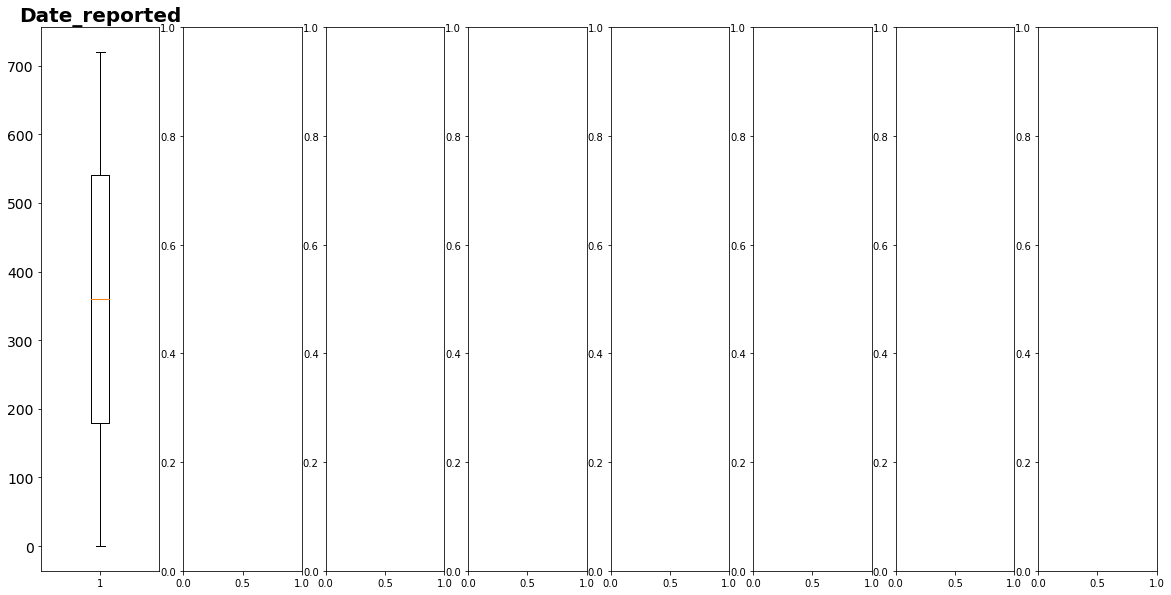

In [29]:
#Diagrama caja de bigotes, los cuales indican los outlayers
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(datita.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(pd.to_numeric(datita.iloc[:,i]), flierprops=red_circle)
    ax.set_title(datita.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()
#datita.plot.box(return_type='axes', vert=True, figsize=(12,5))

Text(0.5, 1.0, 'Correlation and Heatmap')

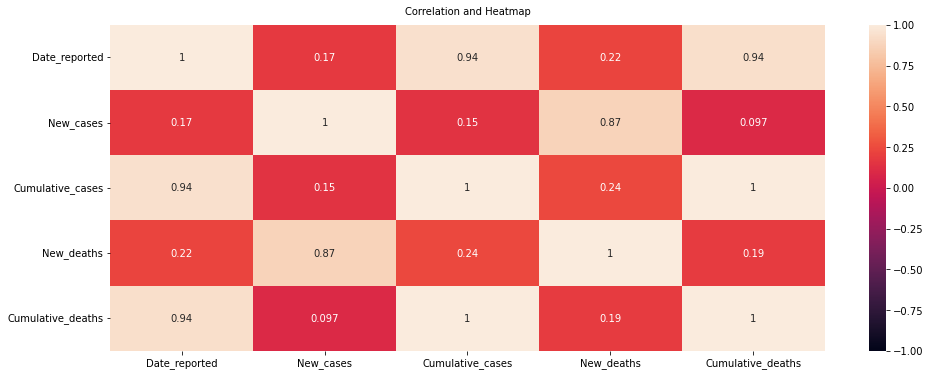

In [9]:
#Se podria decir que se pueden relacionar arriba del 50%
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(datita.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation and Heatmap', fontdict={'fontsize':10}, pad=10)
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [10]:
def poly_reg(degrees, x_test, y_test):
    features = PolynomialFeatures(degree=degrees)
    x_test_transformed = features.fit_transform(x_test)
    model = LinearRegression()
    model.fit(x_test_transformed,y_test)
    test_pred = model.predict(x_test_transformed)
    rmse_poly = mean_squared_error(y_test, test_pred, squared = False)

    return [rmse_poly]

In [11]:
errors = []

for i in range(26):
    errors.append([i] + poly_reg(i, x, y))
    
df2 = pd.DataFrame(errors, columns = ['degree','data'])

C:\Users\HEIDYC~1\AppData\Local\Temp/ipykernel_12500/2584635226.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df2['degree'], df2['data'], 'o-r', label = 'Data',color='#676FA3')


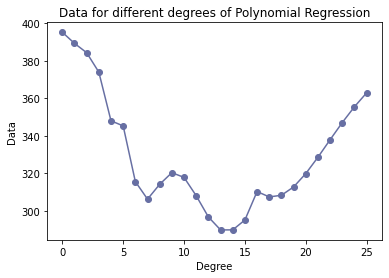

In [12]:
plt.plot(df2['degree'], df2['data'], 'o-r', label = 'Data',color='#676FA3')
plt.xlabel('Degree')
plt.ylabel('Data')
plt.title('Data for different degrees of Polynomial Regression')
plt.show();